In [1]:
#importing the data
import pandas as pd
train_df = pd.read_csv(r'../data/raw/train.csv')
disaster_df_raw = train_df[train_df["target"]==1]
false_disaster_df_raw = train_df[train_df["target"]==0]

In [2]:
#clean DF
from NlpStudyFunctions import CleanDataframeDF

disaster_df = CleanDataframeDF(disaster_df_raw,'text')
false_disaster_df = CleanDataframeDF(false_disaster_df_raw, 'text')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guibe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\guibe\anaconda3\envs\kaggle_project\kaggle_nlp_disaster_tweets\notebooks\NlpStudyFunctions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].apply(SimplePreprocessTextDF)


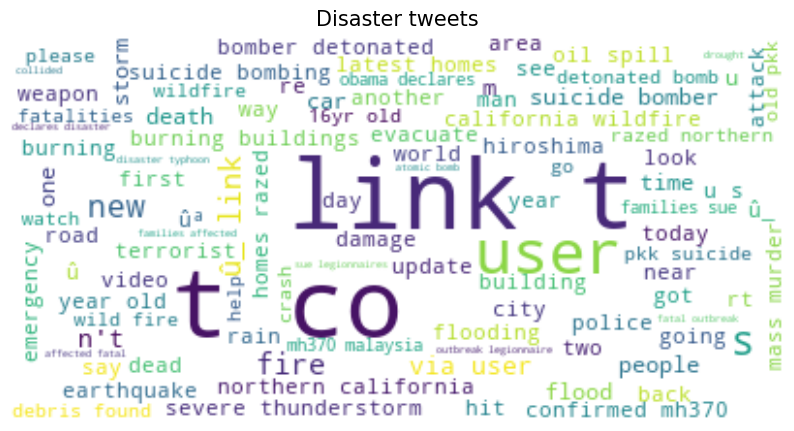

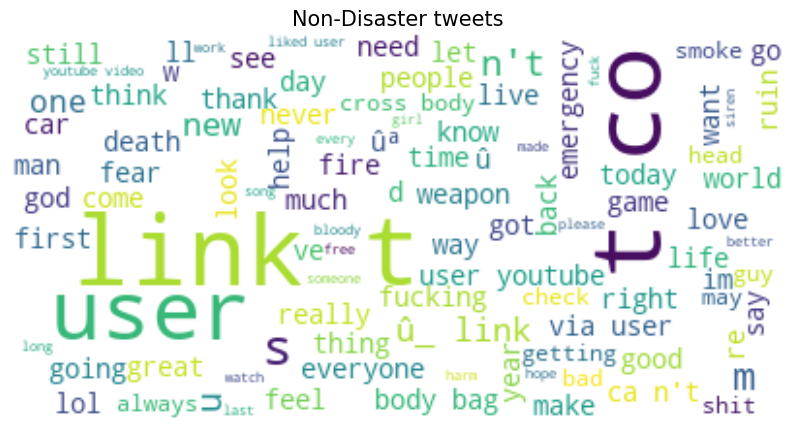

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#generate a word cloud
def GenerateWordCloud(df, title):
    text = " ".join(review for review in df)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

GenerateWordCloud(disaster_df['text'], "Disaster tweets")
GenerateWordCloud(false_disaster_df['text'], "Non-Disaster tweets")

In [4]:
from NlpStudyFunctions import GetTopWords

top_word_count = 10
top_words_right = GetTopWords(disaster_df,top_word_count)
top_words_wrong = GetTopWords(false_disaster_df,top_word_count)

    Word  Frequency
0      :       3676
1   link       2518
2      #       1703
3      .       1075
4   user        906
5  @user        905
6      ?        762
7    ...        592
8      -        398
9      !        330
    Word  Frequency
0      :       3030
1      ?       2364
2   link       2218
3      .       1862
4   user       1856
5  @user       1854
6      #       1700
7      !        843
8     's        517
9      '        439


C:\Users\guibe\AppData\Local\Temp\ipykernel_10048\3096321831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
C:\Users\guibe\AppData\Local\Temp\ipykernel_10048\3096321831.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")


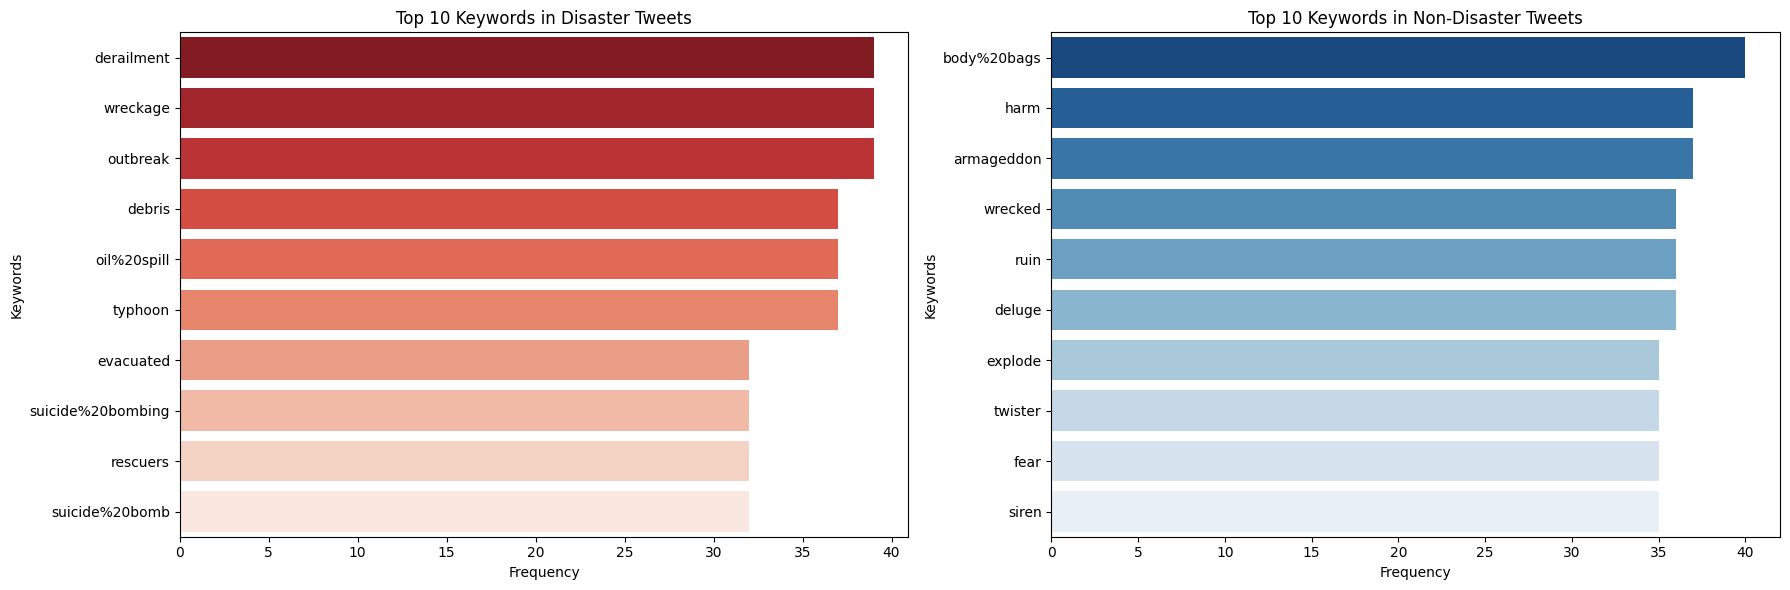

In [5]:
import seaborn as sns

keyword_right = train_df[train_df['target'] == 1]['keyword'].value_counts().head(10)
keyword_wrong = train_df[train_df['target'] == 0]['keyword'].value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Disaster Keywords
sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
ax[0].set_title('Top 10 Keywords in Disaster Tweets')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Keywords')

# Non-Disaster Keywords
sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")
ax[1].set_title('Top 10 Keywords in Non-Disaster Tweets')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Keywords')

plt.tight_layout()
plt.show()